# New heading

# Virat Kohli : Batting Analysis (2008-2018):
**Virat Kohli** is an Indian cricketer. He was born in Delhi, India on November 5, 1988. Virat is the first player in ICC cricket history to win all 3 ICC awards in a single year- ICC ODI player of the year, ICC Test player of the year and ICC Player of the year award in 2018.

<img src="https://images.thequint.com/thequint%2F2018-01%2F5d369107-8477-4216-a39d-ad806e1d3a0c%2FVirat-century.jpg?rect=0%2C0%2C4650%2C2616&auto=format%2Ccompress&fmt=webp&w=700&dpr=1.0.jpg" width="500" height="500" />

**Born**: November 5, 1988, Delhi, India

**Team**: India national cricket team

**Sport**: Cricket

**Nationality**: India

**Data Dictionary**
1. RunsScored : Number of Runs scored by Kohli in the match.
2. BallsFaced : Number of Balls Faces by Kohli in the match.
3. BattingPosition : Batting position is Virat Kohli's position on the batting order.
4. Dismissal : How Kohli got out in the match or not out. Caught, NO: Not Out, Bowled, Run out, LBW, Stumped, Hit wicket.
5. Inning : An innings is one of the divisions of a match during which one team takes its turn to bat. Two 1st inning or 2nd inning.
6. Opposition : Name of the Opposition team.
7. Year : Year in which the match was played.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read Bastman details file
df=pd.read_csv('kohli_edit.csv')
df

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,12,33.0,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,18-Aug-08
1,1,37,82.0,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,20-Aug-08
2,2,25,40.0,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24-Aug-08
3,3,54,87.0,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27-Aug-08
4,4,31,45.0,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29-Aug-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,272,103,113.0,97,6,4,106.18,3,not out,2,Bangladesh,Pune,19-Oct-23
273,273,95,154.0,104,8,2,91.34,3,caught,2,New Zealand,Dharamsala,22-Oct-23
274,274,0,12.0,9,0,0,0.00,3,caught,1,England,Lucknow,29-Oct-23
275,275,88,139.0,94,11,0,93.61,3,caught,1,Sri Lanka,Wankhede,02-Nov-23


In [8]:
# View first 5 rows
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,12,33.0,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,18-Aug-08
1,1,37,82.0,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,20-Aug-08
2,2,25,40.0,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24-Aug-08
3,3,54,87.0,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27-Aug-08
4,4,31,45.0,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29-Aug-08


In [9]:
#Checking Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  277 non-null    int64  
 1   Runs        277 non-null    int64  
 2   Mins        277 non-null    float64
 3   BF          277 non-null    int64  
 4   4s          277 non-null    int64  
 5   6s          277 non-null    int64  
 6   SR          277 non-null    float64
 7   Pos         277 non-null    int64  
 8   Dismissal   277 non-null    object 
 9   Inns        277 non-null    int64  
 10  Opposition  277 non-null    object 
 11  Ground      277 non-null    object 
 12  Start Date  277 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 28.3+ KB


In [10]:
#Dimension of the data
df.shape


(277, 13)

In [11]:
#Null Value Check

df.isnull().sum()/len(df)

Unnamed: 0    0.0
Runs          0.0
Mins          0.0
BF            0.0
4s            0.0
6s            0.0
SR            0.0
Pos           0.0
Dismissal     0.0
Inns          0.0
Opposition    0.0
Ground        0.0
Start Date    0.0
dtype: float64

In [12]:
from sklearn.impute import KNNImputer
impute=KNNImputer()
df['Mins'] = impute.fit_transform(df[['Mins']])

In [13]:
df.isnull().sum()/len(df)

Unnamed: 0    0.0
Runs          0.0
Mins          0.0
BF            0.0
4s            0.0
6s            0.0
SR            0.0
Pos           0.0
Dismissal     0.0
Inns          0.0
Opposition    0.0
Ground        0.0
Start Date    0.0
dtype: float64

In [14]:
df.to_csv('kohli_edit.csv')

In [15]:
# Descriptive summary

df.describe()


,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Inns
count,277.00000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,138.00000,49.191336,72.887967,52.581227,4.606498,0.534296,80.434910,3.198556,1.548736
std,80.10722,43.175949,53.941997,39.341842,4.539723,1.078318,36.688794,0.702169,0.498520
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,69.00000,10.000000,25.000000,17.000000,1.000000,0.000000,62.500000,3.000000,1.000000
50%,138.00000,37.000000,72.887967,47.000000,3.000000,0.000000,81.910000,3.000000,2.000000
75%,207.00000,82.000000,112.000000,83.000000,7.000000,1.000000,100.000000,3.000000,2.000000
max,276.00000,183.000000,220.000000,159.000000,22.000000,8.000000,209.090000,7.000000,2.000000


In [16]:
# Descriptive summary for Numeric and Categorical variables



## Q-1 What is the percentage for Kohli being Not Out.
**Make a Pie Chart displaying the distribution of Dismissals**

In [17]:
df['Dismissal'].value_counts(normalize=True)

Dismissal
caught        0.602888
not out       0.158845
bowled        0.115523
lbw           0.057762
run out       0.043321
stumped       0.018051
hit wicket    0.003610
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

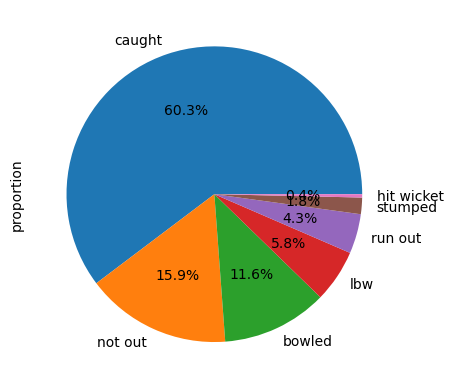

In [18]:
df['Dismissal'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

## Q-2 Find the number of times when kohli scored less than or equal to 7 runs?

In [19]:
df.query('Runs<=7').shape

(54, 13)

In [20]:
len(df.query('Runs<=7'))

54

## Q.4 Use Boxplot to tell the IQR( Inter Quartile Range) middle 50% of runs scored by Kohli?
[Hint: Middle 50% Range= Q3(75%)-Q1(25%)]

<Axes: xlabel='Runs'>

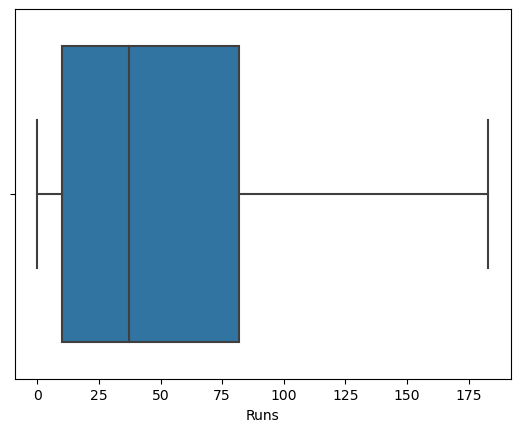

In [21]:
sns.boxplot(data=df,x='Runs')

## Q. What is the best way that the opposition team bowlers can get Kohli out?

How Kohli got dismissed most of the times?

[Hint: Use countplot]

[Text(0, 0, '167'),
 Text(0, 0, '44'),
 Text(0, 0, '32'),
 Text(0, 0, '16'),
 Text(0, 0, '12'),
 Text(0, 0, '5'),
 Text(0, 0, '1')]

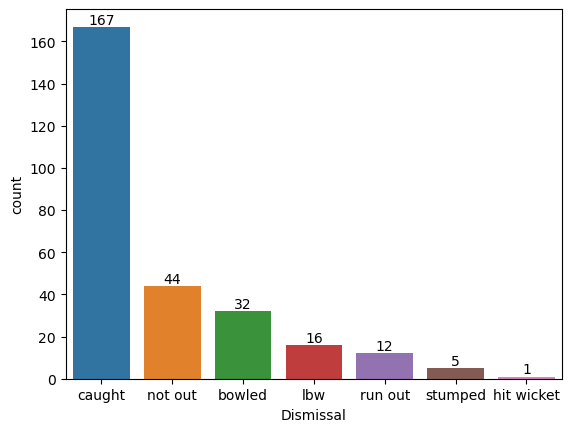

In [22]:
ax=sns.countplot(data=df,x='Dismissal',order=['caught', 'not out', 'bowled', 'lbw', 'run out', 'stumped','hit wicket'])
plt.bar_label(ax.containers[0])

In [23]:
df['Dismissal'].value_counts().index

Index(['caught', 'not out', 'bowled', 'lbw', 'run out', 'stumped',
       'hit wicket'],
      dtype='object', name='Dismissal')

## Q. Against which opposition team Kohli has played the most in his career?
[Hint: Use Countplot]

<Axes: xlabel='count', ylabel='Opposition'>

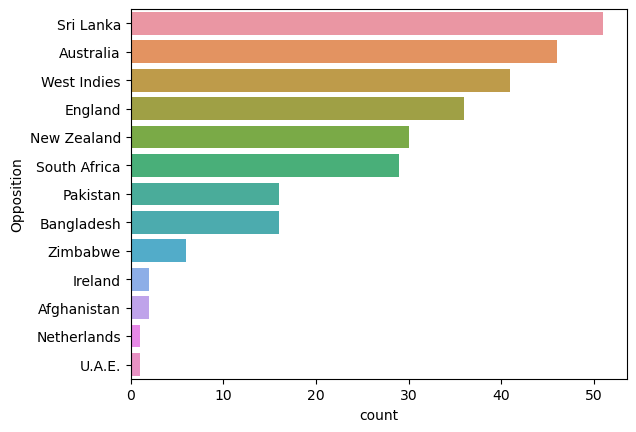

In [24]:
sns.countplot(data=df,y='Opposition',order=df['Opposition'].value_counts().index)

## Q. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.
[Hint: Stacked Bar Plot]

<Axes: xlabel='Opposition', ylabel='count'>

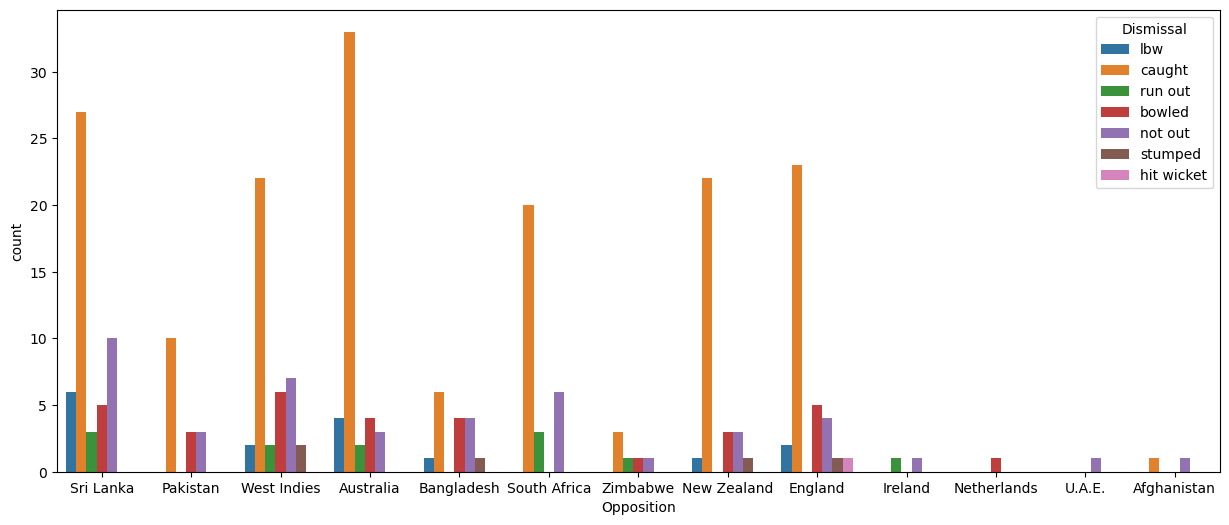

In [25]:
plt.figure(figsize=(15,6))                  # we dont look these charts for two categorical data bcoz its having bias data so we use stack plot
sns.countplot(data=df,x='Opposition',hue='Dismissal') 

In [26]:
pd.crosstab(df['Opposition'],df['Dismissal'],normalize=True)

Dismissal,bowled,caught,hit wicket,lbw,not out,run out,stumped
Opposition,,,,,,,
Afghanistan,0.000000,0.003610,0.00000,0.000000,0.003610,0.00000,0.00000
Australia,0.014440,0.119134,0.00000,0.014440,0.010830,0.00722,0.00000
Bangladesh,0.014440,0.021661,0.00000,0.003610,0.014440,0.00000,0.00361
England,0.018051,0.083032,0.00361,0.007220,0.014440,0.00000,0.00361
Ireland,0.000000,0.000000,0.00000,0.000000,0.003610,0.00361,0.00000
Netherlands,0.003610,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
New Zealand,0.010830,0.079422,0.00000,0.003610,0.010830,0.00000,0.00361
Pakistan,0.010830,0.036101,0.00000,0.000000,0.010830,0.00000,0.00000
South Africa,0.000000,0.072202,0.00000,0.000000,0.021661,0.01083,0.00000


## Q. Which opposition has Kohli scored most runs against? Find the median score against different oppositions and use a boxplot to represent it?
[Hint: Use barchart & BoxPlot]

<Axes: xlabel='Runs', ylabel='Opposition'>

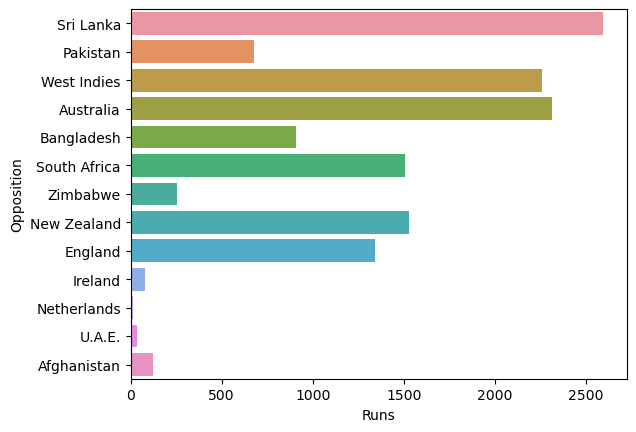

In [27]:
sns.barplot(data=df,y='Opposition',x='Runs',errorbar=('ci',False),estimator=sum)

In [28]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\mpsma\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

## Q. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.
[Hint: Use Boxplot]

<Axes: xlabel='Inns', ylabel='Runs'>

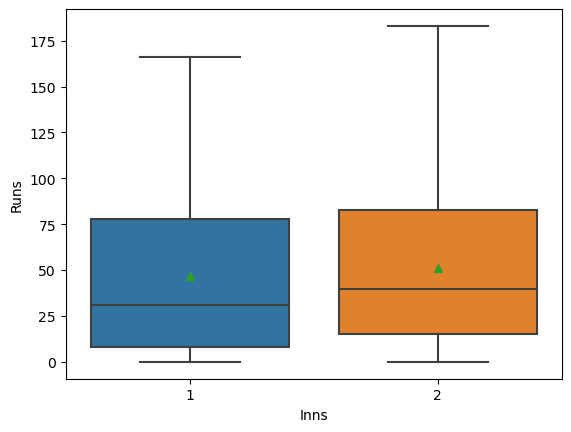

In [29]:
sns.boxplot(data=df,y='Runs',x='Inns',showmeans=True)

In [30]:
# number of 100's scored against each oppositon
df.query('Runs>=100')['Opposition'].value_counts()

Opposition
Sri Lanka       10
West Indies      9
Australia        8
Bangladesh       5
New Zealand      5
South Africa     5
England          3
Pakistan         3
Zimbabwe         1
Name: count, dtype: int64

In [31]:
# find no of matches where ha has scored runs at an interval of 10
df['interval']=pd.cut(df['Runs'],bins=[0,11,21,31,41,51,61,71,81,91,100,200],right=False,include_lowest=True)

<Axes: xlabel='count', ylabel='interval'>

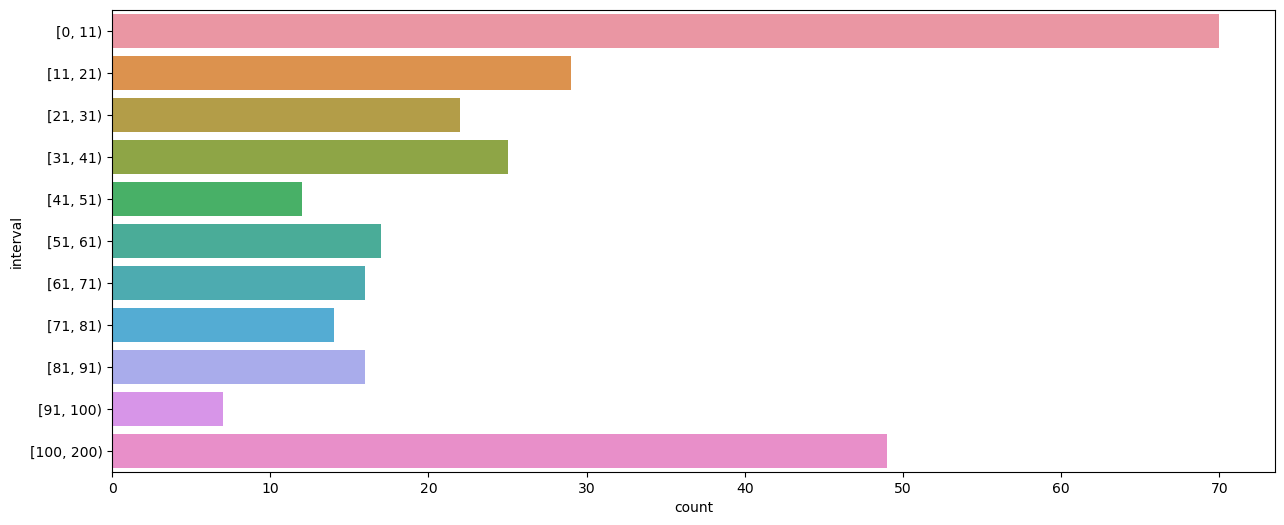

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,y=df['interval'])

## Q. Pre and Post transformation comparison

**It is well known that Kohli started taking fitness much more seriously post an ordinary IPL in 2012. He changed his training regime and eating habits completely, realising the need to transform his body to survive the rigours of playing all three formats.**
<img src="https://cdn.wisden.com/wp-content/uploads/2020/07/Untitled-design-47.png" width="500" height="500" />
<img src= "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSskALcVu6o9iI-7Q_rsehBkQ4PpDN6IAjWwA&usqp=CAU" width="500" height="500" />

**Kohli says it was the absence of fear or respect for him in the opposition's eye that has forced him to change his work ethic
Kohli revealed how working on his fitness has lifted his game after coming back from the Australian tour in 2012
While he considers his idol Tendulkar's skills as a cricketer in a different league, his is a case of pure hard work**

In [33]:
df['pddateformat']=pd.to_datetime(df['Start Date'],format='%d-%b-%y')

In [34]:
df['year']=df['pddateformat'].dt.year
df

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,interval,pddateformat,year
0,0,12,33.0,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,18-Aug-08,"[11, 21)",2008-08-18,2008
1,1,37,82.0,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,20-Aug-08,"[31, 41)",2008-08-20,2008
2,2,25,40.0,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24-Aug-08,"[21, 31)",2008-08-24,2008
3,3,54,87.0,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27-Aug-08,"[51, 61)",2008-08-27,2008
4,4,31,45.0,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29-Aug-08,"[31, 41)",2008-08-29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,272,103,113.0,97,6,4,106.18,3,not out,2,Bangladesh,Pune,19-Oct-23,"[100, 200)",2023-10-19,2023
273,273,95,154.0,104,8,2,91.34,3,caught,2,New Zealand,Dharamsala,22-Oct-23,"[91, 100)",2023-10-22,2023
274,274,0,12.0,9,0,0,0.00,3,caught,1,England,Lucknow,29-Oct-23,"[0, 11)",2023-10-29,2023
275,275,88,139.0,94,11,0,93.61,3,caught,1,Sri Lanka,Wankhede,02-Nov-23,"[81, 91)",2023-11-02,2023


Adding a column giving true for those rows which represent post transformation 

In [35]:
df['transformation']=np.where(df['year']<=2012,'pre','post')

In [36]:
df

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,interval,pddateformat,year,transformation
0,0,12,33.0,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,18-Aug-08,"[11, 21)",2008-08-18,2008,pre
1,1,37,82.0,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,20-Aug-08,"[31, 41)",2008-08-20,2008,pre
2,2,25,40.0,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24-Aug-08,"[21, 31)",2008-08-24,2008,pre
3,3,54,87.0,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27-Aug-08,"[51, 61)",2008-08-27,2008,pre
4,4,31,45.0,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29-Aug-08,"[31, 41)",2008-08-29,2008,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,272,103,113.0,97,6,4,106.18,3,not out,2,Bangladesh,Pune,19-Oct-23,"[100, 200)",2023-10-19,2023,post
273,273,95,154.0,104,8,2,91.34,3,caught,2,New Zealand,Dharamsala,22-Oct-23,"[91, 100)",2023-10-22,2023,post
274,274,0,12.0,9,0,0,0.00,3,caught,1,England,Lucknow,29-Oct-23,"[0, 11)",2023-10-29,2023,post
275,275,88,139.0,94,11,0,93.61,3,caught,1,Sri Lanka,Wankhede,02-Nov-23,"[81, 91)",2023-11-02,2023,post


<Axes: xlabel='transformation', ylabel='Runs'>

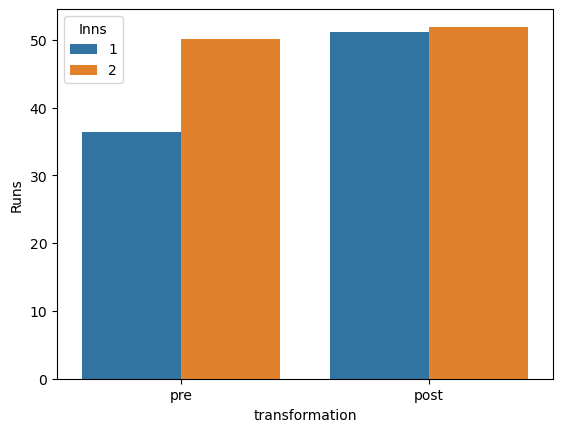

In [37]:
sns.barplot(data=df,x='transformation',y='Runs',errorbar=('ci',False),hue='Inns')

In [38]:
df.to_csv('kohli.csv')

## Use a Boxplot to compare the runs Scored before and after transformation


<Axes: xlabel='transformation', ylabel='Runs'>

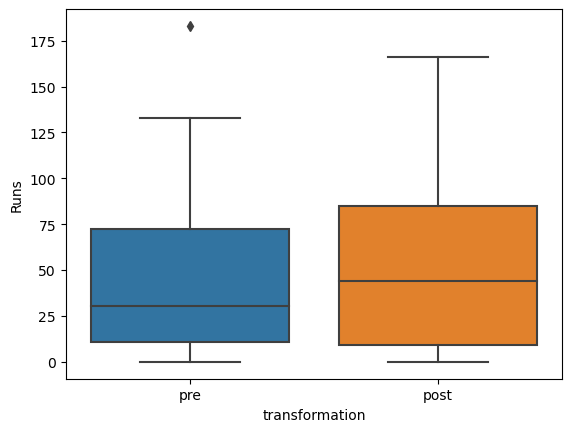

In [39]:
sns.boxplot(data=df,y='Runs',x='transformation')

## Use a Boxplot to compare the Balls Faced before and after transformation

<Axes: xlabel='transformation', ylabel='BF'>

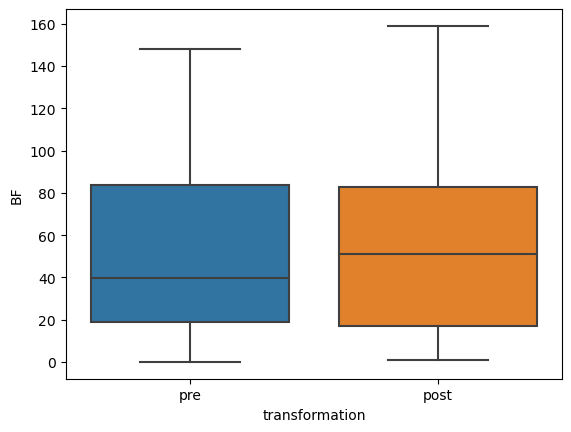

In [40]:
sns.boxplot(data=df, y='BF',x='transformation')

<Axes: ylabel='count'>

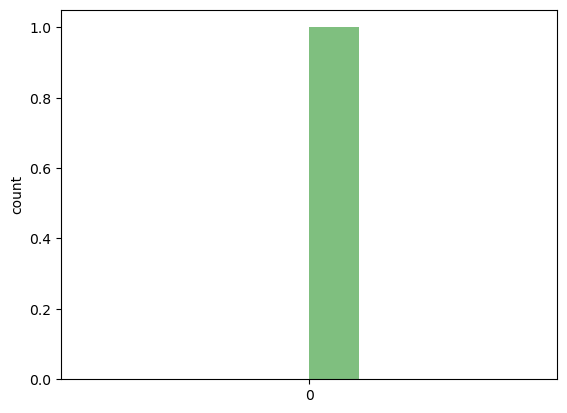

In [41]:
plt.hist(x='Runs',color='green',alpha=0.5
        )

sns.countplot()

## Use a Boxplot to compare the runs Scored before and after transformation with Hue as innings(innings wise)


<Axes: xlabel='transformation', ylabel='Runs'>

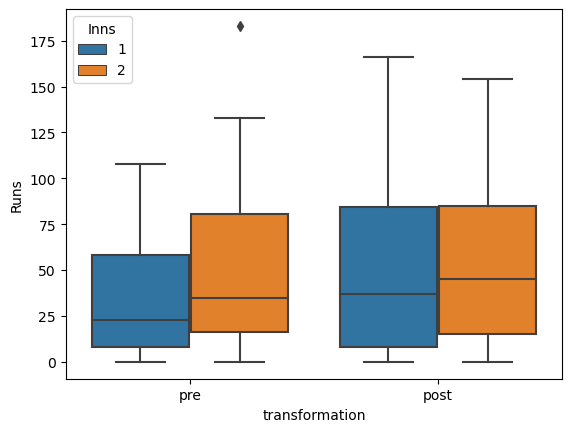

In [42]:
sns.boxplot(data=df,y='Runs',x='transformation',hue='Inns')

## Use a bar plot to compare the dismissal patterns before and after transformation.
[Hint: Bar Plot]

<Axes: xlabel='transformation'>

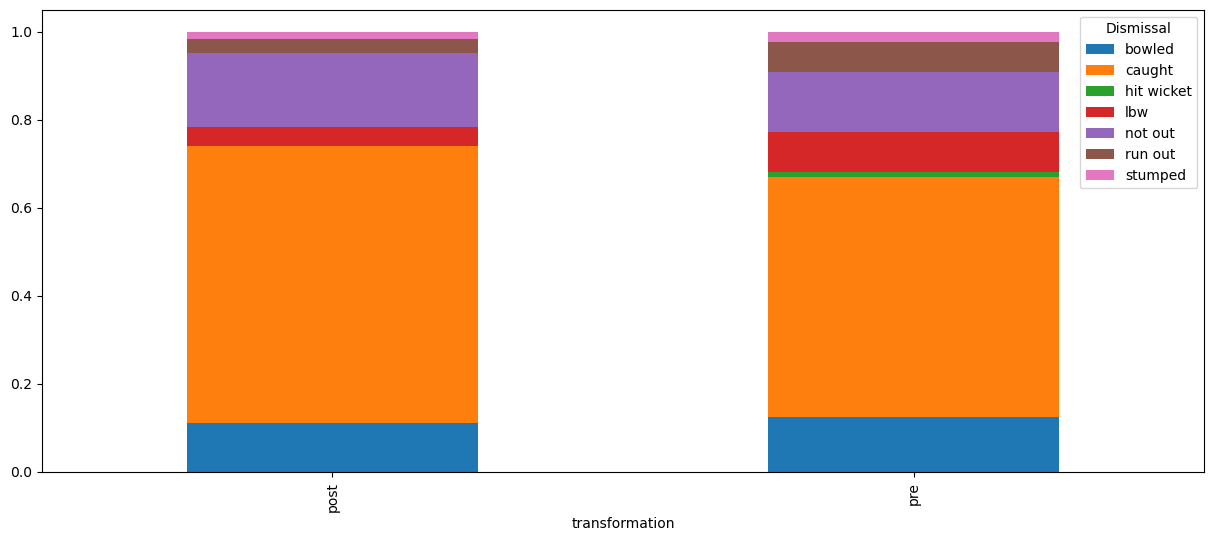

In [43]:
pd.crosstab(df['transformation'],df['Dismissal'],normalize='index').plot(kind='bar',stacked=True,figsize=(15,6))

# we dont use below one we use above one

In [45]:
#sns.barplot(data=df,x='Dismissal',y='transformation',order=['caught', 'not out', 'bowled', 'lbw', 'run out', 'stumped','hit wicket'],errorbar=('ci',False))

## Use Pointplot to Visualize Yearly trend in run scored by Virat Kohli
[Hint: pointplot]

<Axes: xlabel='year', ylabel='Runs'>

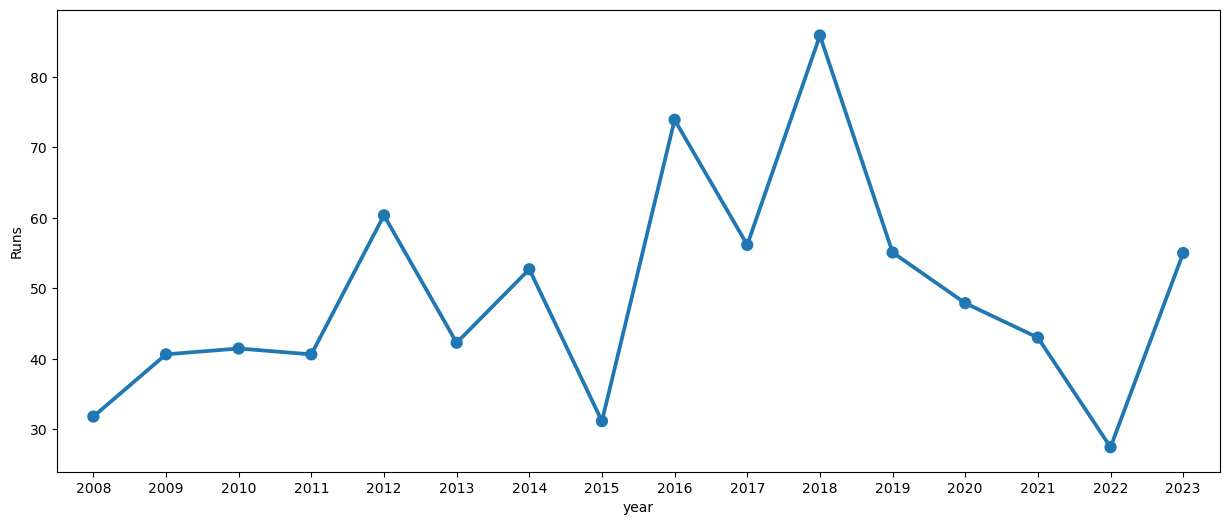

In [46]:
plt.figure(figsize=(15,6))
sns.pointplot(data=df,y='Runs',x='year',errorbar=('ci',False))

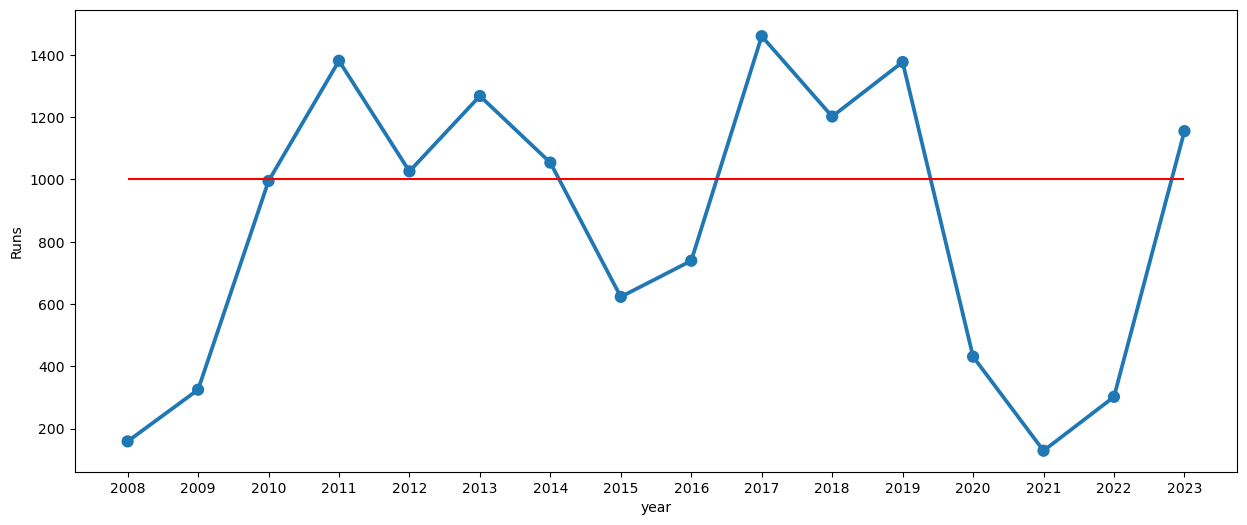

In [47]:
plt.figure(figsize=(15,6))
sns.pointplot(data=df,y='Runs',x='year',errorbar=('ci',False),estimator=sum)
plt.hlines(1000,0,15,colors='red')

## Can we say there is a  linear relationship between RunsScored & BallsFaced over different batting positions?
[Hint: Use LMplot]

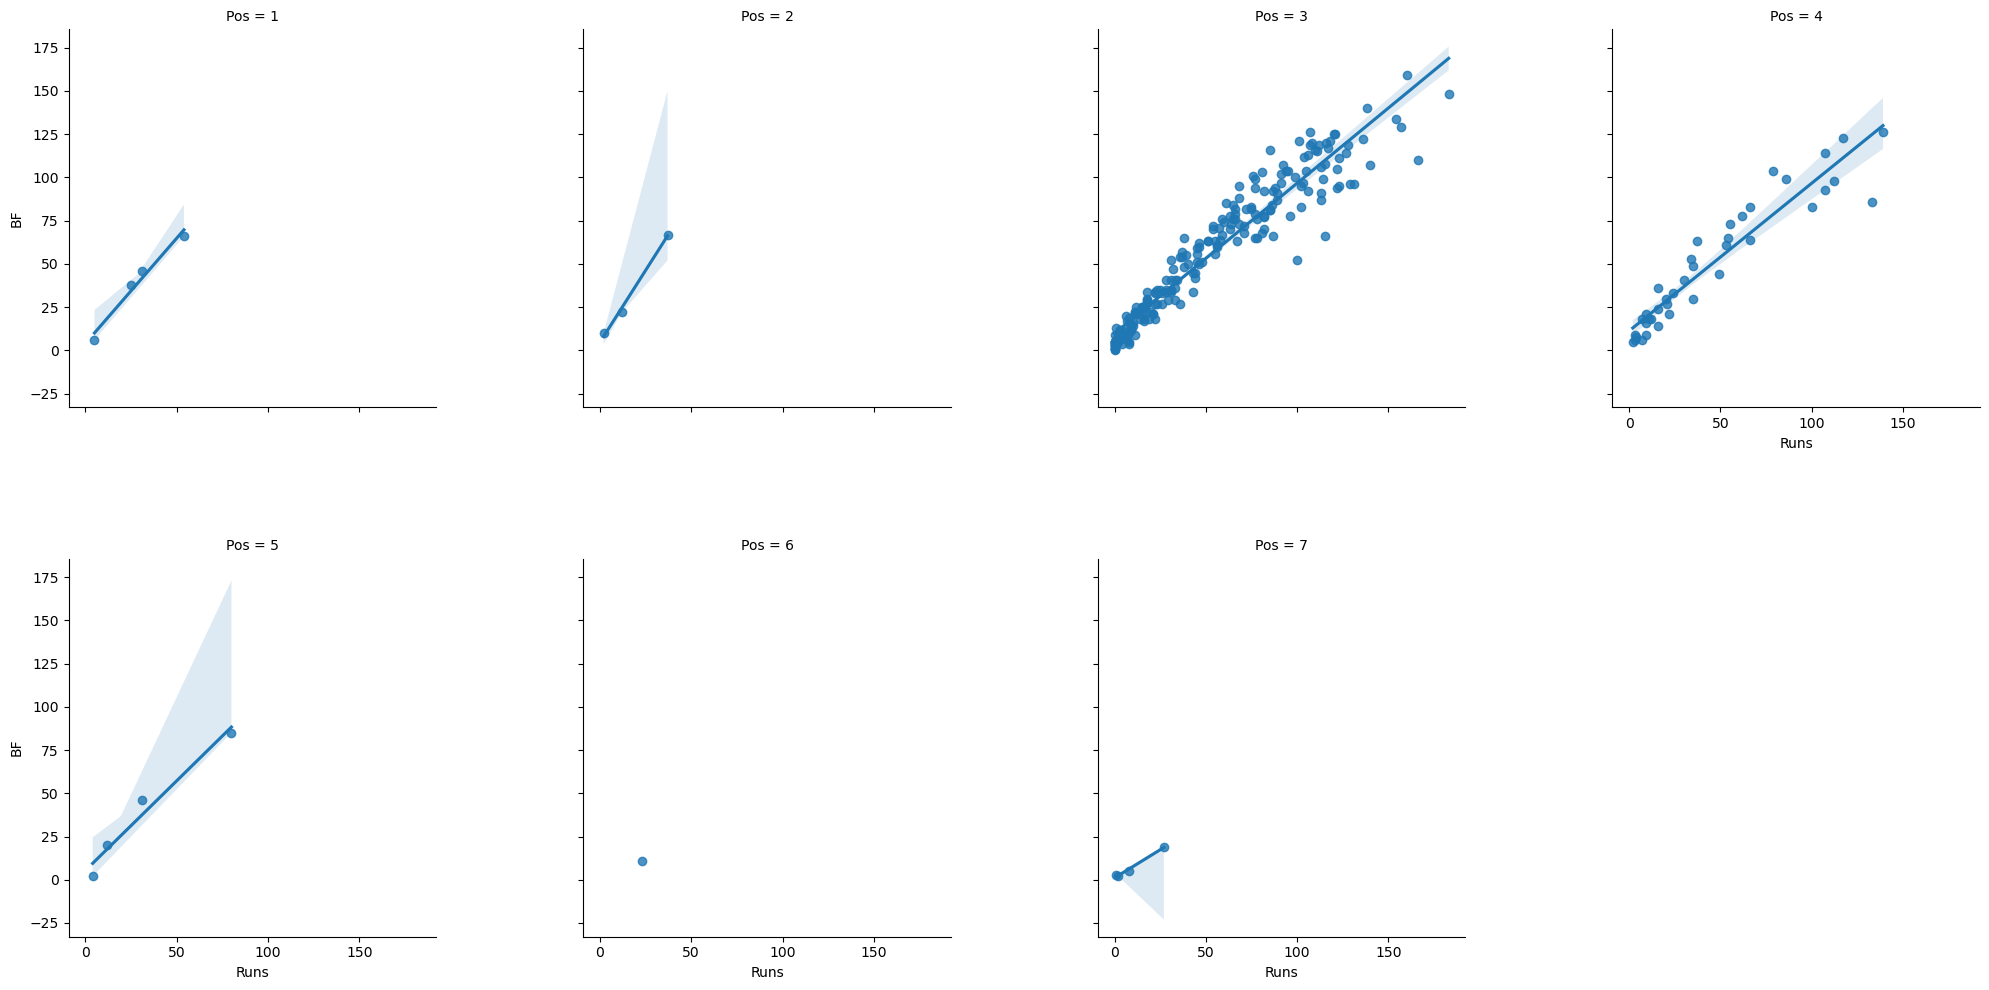

In [48]:

sns.lmplot(data=df,x='Runs',y='BF',col='Pos',col_wrap=4)
plt.subplots_adjust(hspace=0.4, wspace=0.4)


## How the batting position has changed with different oppositions yearly?
[Hint: FacetGrid]

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.FacetGrid(data=df,col='Opposition',col_wrap=4)
ax.map(sns.pointplot,'year','Pos',errorbar=('ci',False))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

                                             **Happy Learning**